# Đặt câu hỏi, phân tích và trả lời

**Câu hỏi:** `Studio` sản xuất có là một phần quan trọng để tạo nên những bộ phim được đánh giá cao hay không?

**Lợi ích:** 
- Định hướng chiến lược sản xuất phim:
  + Có thể xác định được `Studio` nào phổ biến và sản xuất được nhiều phim có đánh giá cao, từ đó lựa chọn `Studio` phù hợp cho các dự án làm phim.
  + Việc hiểu rõ các yếu tố này sẽ giúp các đạo diễn lựa chọn `Studio` có tiềm năng thành công, giảm thiểu rủi ro trong sản xuất phim.
- Nâng cao sự hiểu biết về các yếu tố ảnh hưởng đến đánh giá phim: Câu hỏi này sẽ giúp bạn hiểu ngoài những yếu tố khác thì liệu `Studio` có phải là một yếu tố quan trọng ảnh hưởng đến sự thành công của một bộ phim hay không. Từ đó, có thể hình thành những hệ thống, mô hình sau này.

**Cách trả lời:**
- Xem xét điểm đánh giá trung bình của các `Studio` để thấy được những `Studio` có xu hướng tạo ra những bộ Anime có điểm đánh giá cao.
- Xem xét các `Studio` phổ biến để xem mức độ phân hóa điểm như thế nào, có rõ ràng hay không và có điểm đánh giá cao hay không.
- Xem xét mối quan hệ giữa điểm đánh giá, số lượt đánh giá và số lượng phim để có cái nhìn tổng quan về các `Studio`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Đọc dữ liệu

In [2]:
df = pd.read_csv('./anime_preprocessing.csv')
print(df.isnull().sum())

ID                 0
Title              0
Episodes           0
Type               0
Aired              0
Producers          0
Studios            0
Source             0
Genres             0
Duration (mins)    0
Score              0
Scored By          0
Popularity         0
Year               0
dtype: int64


## Xử lý

In [3]:
# Xóa toàn bộ dòng có giá trị NULL
cleaned_df = df.dropna()
print(cleaned_df.isnull().sum())  # Kiểm tra số lượng giá trị NULL còn lại
print(cleaned_df.shape)          # Kiểm tra kích thước dữ liệu sau khi làm sạch

ID                 0
Title              0
Episodes           0
Type               0
Aired              0
Producers          0
Studios            0
Source             0
Genres             0
Duration (mins)    0
Score              0
Scored By          0
Popularity         0
Year               0
dtype: int64
(16840, 14)


In [4]:
# Tính phần trăm các giá trị "Unknown" trong cột "Studios"
unknown_studios_count = cleaned_df[cleaned_df['Studios'] == 'UNKNOWN'].shape[0]  # Đếm số dòng có giá trị "UNKNOWN"
total_studios_count = cleaned_df.shape[0]  # Tổng số dòng
unknown_studios_percent = (unknown_studios_count / total_studios_count) * 100  # Tính phần trăm

# In kết quả
print(f"Phần trăm các giá trị 'UNKNOWN' trong cột 'Studios': {unknown_studios_percent:.2f}%")

Phần trăm các giá trị 'UNKNOWN' trong cột 'Studios': 22.64%


Số lượng giá trị "UNKNOWN" là khá lớn, cho thấy đa phần các phim chưa đề cập rõ ràng về `Studios`, tuy nhiên, các dòng này cũng không cung cấp giá trị để chúng ta phân tích nên ta sẽ xóa các dòng "UNKNOWN" này.

In [5]:
cleaned_df = cleaned_df[cleaned_df['Studios'] != 'UNKNOWN']

In [6]:
# Check kết quả
print(cleaned_df[cleaned_df['Studios'] == 'UNKNOWN'].shape[0])

0


Giá trị trong cột Studios là 1 chuỗi với nhiều Studio khác nhau, vì vậy, nếu phân tích với nguyên chuỗi như thế này sẽ ảnh hưởng đến kết quả phân tích theo từng nhóm Studio khác nhau. Do đó, ta sẽ tách các Studio trong cùng 1 ô ra để dễ phân tích hơn.

In [7]:
cleaned_df['Studios'] = cleaned_df['Studios'].str.split(', ')
cleaned_df = cleaned_df.explode('Studios')
cleaned_df.head()
#Xem thử kết quả sau khi explode

,ID,Title,Episodes,Type,Aired,Producers,Studios,Source,Genres,Duration (mins),Score,Scored By,Popularity,Year
0,1.0,Cowboy Bebop,26,TV,"Apr 3, 1998 to Apr 24, 1999",Bandai Visual,Sunrise,Original,"Action, Award Winning, Sci-Fi",24.0,8.75,988000.0,43,1998
1,5.0,Cowboy Bebop: Tengoku no Tobira,1,Movie,"Sep 1, 2001","Sunrise, Bandai Visual",Bones,Original,"Action, Sci-Fi",115.0,8.38,219779.0,631,2001
2,6.0,Trigun,26,TV,"Apr 1, 1998 to Sep 30, 1998",Victor Entertainment,Madhouse,Manga,"Action, Adventure, Sci-Fi",24.0,8.22,380049.0,258,1998
3,7.0,Witch Hunter Robin,26,TV,"Jul 3, 2002 to Dec 25, 2002","Bandai Visual, Dentsu, Victor Entertainment",Sunrise,Original,"Action, Drama, Mystery, Supernatural",25.0,7.24,44600.0,1908,2002
4,8.0,Bouken Ou Beet,52,TV,"Sep 30, 2004 to Sep 29, 2005","TV Tokyo, Dentsu",Toei Animation,Manga,"Action, Adventure, Fantasy",23.0,6.93,6891.0,5485,2004


## Phân tích

### Biểu đồ 1: Xây dựng điểm đánh giá trung bình của các `Studio`

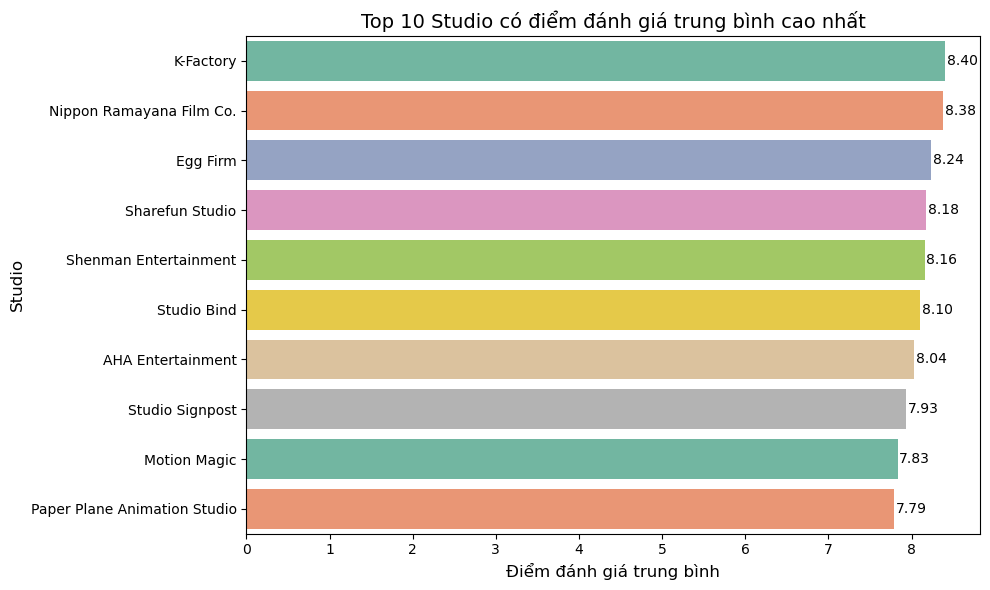

In [8]:
# Tính trung bình điểm số của từng Studio
top_studios = (cleaned_df.groupby('Studios')['Score'].mean().sort_values(ascending=False).head(10))

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_studios.values, y=top_studios.index, hue=top_studios.index, palette="Set2", dodge=False)

# Thêm giá trị điểm trung bình vào các thanh
for i in range(len(top_studios)):
    ax.text(top_studios.values[i] + 0.02, i, f'{top_studios.values[i]:.2f}', ha='left', va='center', fontsize=10)

# Tiêu đề và nhãn trục
plt.title('Top 10 Studio có điểm đánh giá trung bình cao nhất', fontsize=14)
plt.xlabel('Điểm đánh giá trung bình', fontsize=12)
plt.ylabel('Studio', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# Tính điểm trung bình và số lượng phim của từng Studio
studios_stats = cleaned_df.groupby('Studios').agg(
    avg_score=('Score', 'mean'),  # Điểm trung bình
    num_movies=('Studios', 'size')  # Số lượng phim
).reset_index()

# Sắp xếp theo điểm trung bình giảm dần
studios_stats_sorted = studios_stats.sort_values(by='avg_score', ascending=False)

# Lấy top Studios có điểm đánh giá trung bình cao nhất (ví dụ: top 10)
top_studios_high_score = studios_stats_sorted.head(10)

# Hiển thị kết quả
print(top_studios_high_score)

                          Studios  avg_score  num_movies
375                     K-Factory   8.403333           3
519      Nippon Ramayana Film Co.   8.380000           1
226                      Egg Firm   8.240000           3
682               Sharefun Studio   8.177500           4
686         Shenman Entertainment   8.160000           3
736                   Studio Bind   8.100000           7
16              AHA Entertainment   8.035000           2
820               Studio Signpost   7.933333           6
496                  Motion Magic   7.831538          13
574  Paper Plane Animation Studio   7.790000           2


**Quan sát:**
- Studio dẫn đầu: K-Factory đứng đầu với điểm đánh giá trung bình cao nhất là 8.40, với tổng số lượng phim phát hành là 3.
- Các Studio kế tiếp:
    + Nippon Ramayana Film Co. (8.38) chỉ phát hành 1 phim, nhưng có điểm trung bình rất cao.
    + Egg Firm (8.24) và Sharefun Studio (8.17) lần lượt đứng thứ 3 và 4, đều có tổng số phim phát hành dưới 5 (3 và 4 phim).
- Các Studio trong top dưới:
    + Paper Plane Animation Studio đứng cuối danh sách, với điểm trung bình 7.79 từ 2 phim.
    + Motion Magic (7.83) phát hành 13 phim, là Studio có số lượng phim cao nhất trong danh sách.
- Số lượng phim:
    + Đa phần các Studio phát hành ít hơn hoặc bằng 7 phim.
    + Motion Magic là ngoại lệ, với 13 phim, nhưng điểm trung bình không quá nổi bật so với các Studio có ít phim hơn.

**Nhận xét:**

- Chênh lệch điểm:
  + Chênh lệch giữa Studio có điểm trung bình cao nhất (8.40) và thấp nhất (7.79) là 0.61, cho thấy mức độ cạnh tranh về chất lượng giữa các Studio này vẫn còn sát sao.
  + Các Studio có số phim ít (1-4 phim) như Nippon Ramayana Film Co., Egg Firm, hoặc Sharefun Studio thường có điểm trung bình cao, điều này có thể bị ảnh hưởng bởi sự thiên lệch nếu chỉ một hoặc hai phim nhận được đánh giá xuất sắc.
- Số lượng phim và độ tin cậy của điểm trung bình:
    + Những Studio như Motion Magic với số lượng phim nhiều hơn (13 phim) có điểm đánh giá trung bình ổn định hơn, do điểm này phản ánh nhiều sản phẩm.
    + Trong khi đó, các Studio như Nippon Ramayana Film Co. (chỉ có 1 phim) có thể không phản ánh toàn diện về chất lượng, bởi điểm trung bình dễ bị ảnh hưởng bởi một tác phẩm duy nhất.
- Phân bố điểm trung bình:
    + Tất cả các Studio trong danh sách đều có điểm trung bình trên 7.7, chứng tỏ các sản phẩm của họ được đánh giá cao trong ngành.
    + Top 3 Studio (K-Factory, Nippon Ramayana Film Co., Egg Firm) đều có điểm trên 8.2, phản ánh sự nổi bật về chất lượng sản phẩm.

**Kết luận:**
- Chất lượng và sự đồng đều: Các Studio có mức đánh giá cao, thể hiện chất lượng sản phẩm tốt. Tuy nhiên, sự thiên lệch có thể xảy ra khi Studio phát hành ít phim, dẫn đến việc khó đánh giá chính xác năng lực tổng thể.
- Cần mở rộng sản phẩm: Để khẳng định vị trí trong ngành, các Studio như Nippon Ramayana Film Co. hay Egg Firm cần phát hành thêm nhiều sản phẩm để đảm bảo tính ổn định trong đánh giá.
- Số lượng không quyết định chất lượng: Motion Magic với số lượng phim cao nhất lại có điểm đánh giá trung bình không cao như những Studio phát hành ít phim hơn, điều này cho thấy chất lượng không chỉ phụ thuộc vào số lượng phim.

### Biểu đồ 2: Phân phối điểm số của các `Studio` phổ biến

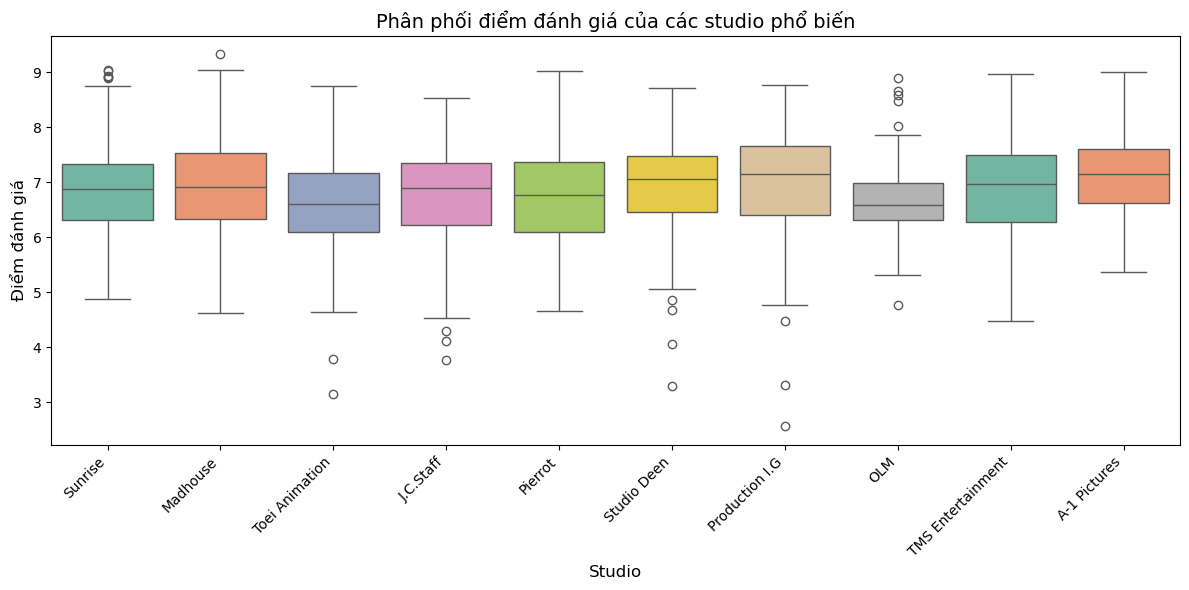

In [10]:
# Lấy top các studio có nhiều bộ phim nhất
studios_counts = cleaned_df['Studios'].value_counts()
top_studios = studios_counts.head(10).index
filtered_df = cleaned_df[cleaned_df['Studios'].isin(top_studios)]

# Vẽ biểu đồ hộp
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Studios', y='Score', hue='Studios', palette='Set2', dodge=False)

plt.title('Phân phối điểm đánh giá của các studio phổ biến', fontsize=14)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Quan sát:**
- Sunrise, Pierrot, Studio Deen, OLM: Điểm trung vị 7.0, phạm vi phân phối tương đối rộng, có một số outliers thấp (~4.0), thể hiện chất lượng tương đối đồng đều nhưng vẫn có sự chênh lệch.
- Madhouse, Production I.G, A-1 Pictures: Điểm trung vị cao (~7.5), phân phối hẹp và ít outliers, cho thấy chất lượng sản phẩm ổn định và đáng tin cậy.
- Toei Animation, J.C.Staff, TMS Entertainment: Điểm trung vị thấp hơn (~6.5-7.0), nhiều outliers, thể hiện sự không ổn định và chất lượng sản phẩm kém đồng đều.

**Nhận xét:**
- Các studio nổi bật: Madhouse, Production I.G, và A-1 Pictures có điểm trung vị cao và phân phối đồng đều, thể hiện chất lượng ổn định và ít sản phẩm bị đánh giá thấp.
- Studio cần cải thiện: J.C.Staff và TMS Entertainment cần nâng cao chất lượng sản phẩm để cải thiện điểm đánh giá trung bình và giảm sự phân hóa.
- Chất lượng trung bình ngành: Phổ điểm từ 6.5 đến 8.0 cho thấy mặt bằng chung các sản phẩm anime đạt chất lượng tốt, nhưng vẫn còn sự phân hóa giữa các studio trong việc duy trì sự đồng đều.

### Biểu đồ 3: Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của nhóm Studio có điểm đánh giá trung bình cao nhất và nhóm Studio phổ biến nhất

                         Studios  num_movies  avg_score  total_reviews
0                   A-1 Pictures         230   7.135739     34859743.0
1              AHA Entertainment           2   8.035000        67388.0
2                       Egg Firm           3   8.240000       915146.0
3                      J.C.Staff         397   6.764332     26515746.0
4                      K-Factory           3   8.403333        98012.0
5                       Madhouse         361   6.939335     30308931.0
6                   Motion Magic          13   7.831538        38084.0
7       Nippon Ramayana Film Co.           1   8.380000         6081.0
8                            OLM         255   6.652275      6326522.0
9   Paper Plane Animation Studio           2   7.790000         6048.0
10                       Pierrot         270   6.760556     18541122.0
11                Production I.G         329   7.009422     18745945.0
12               Sharefun Studio           4   8.177500       151831.0
13    

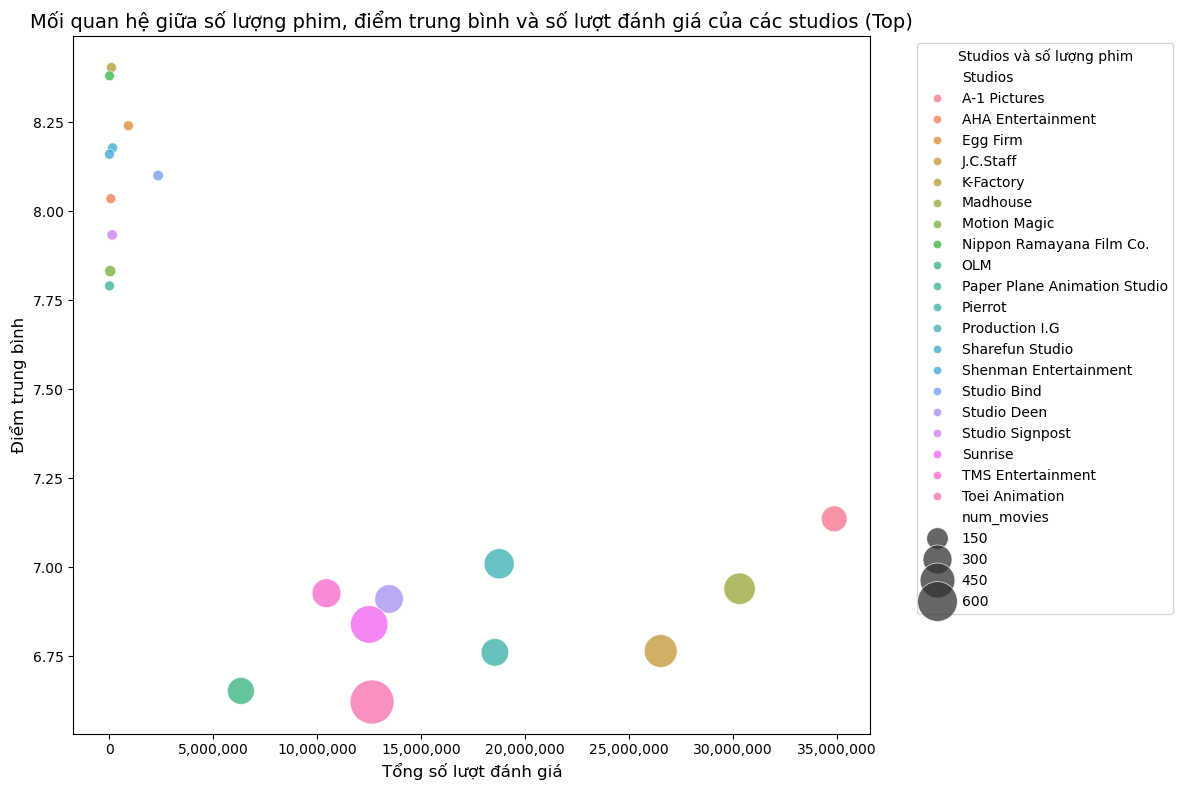

In [11]:
import matplotlib.ticker as ticker

# Tính top studio theo điểm trung bình
top_score_studios = (
    cleaned_df.groupby('Studios')['Score'].mean()
    .sort_values(ascending=False)
    .head(10).index
)

# Tính top Studios theo số lượng phim
top_count_studios = cleaned_df['Studios'].value_counts().head(10).index

# Kết hợp hai danh sách
top_studios = set(top_score_studios).union(top_count_studios)

# Lọc dữ liệu cho các studio này
filtered_df = cleaned_df[cleaned_df['Studios'].isin(top_studios)]

# Tính số lượng phim, điểm trung bình, tổng số lượt đánh giá
studios_stats = filtered_df.groupby('Studios').agg(
    num_movies=('Studios', 'size'),
    avg_score=('Score', 'mean'),
    total_reviews=('Scored By', 'sum')
).reset_index()

# Hiển thị bảng kết quả tính toán
print(studios_stats)

# Vẽ biểu đồ Bubble Plot
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=studios_stats,
    x='total_reviews',
    y='avg_score',
    size='num_movies',
    sizes=(50, 1000),
    hue='Studios',
    palette=sns.color_palette("husl", len(studios_stats)),
    legend='brief', 
    alpha=0.75
)

# Tùy chỉnh tiêu đề và nhãn
plt.title('Mối quan hệ giữa số lượng phim, điểm trung bình và số lượt đánh giá của các studios (Top)', fontsize=14)
plt.xlabel('Tổng số lượt đánh giá', fontsize=12)
plt.ylabel('Điểm trung bình', fontsize=12)

# Định dạng trục x để hiển thị rõ số lớn
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Thêm dấu phẩy ngăn cách hàng nghìn

# Cấu hình legend
handles, labels = bubble_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Studios và số lượng phim', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()

- Nhận xét
  + Quan sát:
    + Phân nhóm Studio theo xu hướng nổi bật:
      + Nhóm studio chất lượng cao nhưng ít phổ biến: Nhóm studio này khá đông, các đại diện có điểm số cao nhất là: K-Factory, Nippon Ramayana Film Co., Egg Firm. Điểm trung bình rất cao (từ 7.75 trở lên) nhưng tổng số lượt đánh giá thấp và chỉ có một số lượng phim hạn chế. Các studio này tập trung vào chất lượng nội dung, phù hợp với khán giả yêu thích tác phẩm tinh tế. Các Studio này có khả năng tạo ra các sản phẩm chất lượng, nhưng do quy mô nhỏ và phạm vi phát hành hạn chế, họ chưa có nhiều khán giả. Nếu mở rộng hoạt động sản xuất và quảng bá tốt hơn, họ có tiềm năng tăng sự phổ biến.
      + Nhóm studio nổi bật về số lượng đánh giá và mức độ phổ biến: Các đại diện: J.C.Staff, Madhouse, A-1 Pictures. Số lượng phim tương đối và tổng số lượt đánh giá cao (trên 25 triệu). Điểm trung bình thường khá cao (từ 6.75) nhưng không vượt trội. Đây là các Studio lớn, thường sản xuất phim đại chúng, tiếp cận được lượng khán giả lớn, phát hành nhiều sản phẩm đa dạng để thu hút khán giả rộng rãi nhưng chất lượng không ổn định. Một số phim có thể đạt điểm cao, nhưng nhiều phim khác lại bị đánh giá thấp, kéo điểm trung bình xuống.
      + Nhóm studio có sản lượng lớn nhưng chất lượng trung bình: Các đại diện: Toei Animation, Sunrise, TMS Entertainment, Deen. Số lượng phim sản xuất lớn, chất lượng phim ở mức trung bình (dưới 7). Tổng số lượt đánh giá ở mức trung bình (10 - 15 triệu). Đây là các Studio tập trung vào việc sản xuất hàng loạt, nội dung đại trà để tiếp cận khán giả rộng rãi.
  + Mối quan hệ giữa các yếu tố trong biểu đồ:
    + Số lượng và chất lượng: Studio sản xuất nhiều phim hơn (như Toei Animation, Sunrise) thường khó duy trì chất lượng đồng đều, trong khi ít phim (như Nippon Ramayana Film Co., AHA Entertainment) đạt điểm cao.
    + Lượt đánh giá và mức độ phổ biến: Lượt đánh giá cao phản ánh độ phổ biến, nhưng không đảm bảo chất lượng (ví dụ: A1-Pictures có khoảng 35 triệu lượt đánh giá nhưng điểm trung bình chỉ khoảng 7.1. Ngược lại, các studio như Shenman Entertainment có điểm trung bình cao nhưng số lượt đánh giá thấp, cho thấy lượng khán giả hạn chế.)
  + Ý nghĩa:
    + Gợi ý chiến lược:
      + Đối với Studio lớn: Tập trung vào việc nâng cao chất lượng sản phẩm, giảm số lượng phim sản xuất trong thời gian ngắn để đảm bảo tính đồng đều. Khai thác lại các phim có điểm cao để tối ưu hóa danh tiếng và giữ chân khán giả.
      + Đối với Studio nhỏ: Đầu tư vào marketing và mở rộng phạm vi phát hành để tăng số lượt đánh giá. Hợp tác với các nhà phân phối lớn để tiếp cận nhiều khán giả hơn.
      + Đối với các Studio sản xuất cân bằng: Tiếp tục duy trì chiến lược sản xuất ổn định, đảm bảo điểm trung bình cao để giữ vững vị thế. Cân nhắc mở rộng thêm số lượng phim để tăng thị phần nhưng không làm giảm chất lượng. 
  + Như vậy, nhìn chung các phim có sự chênh lệch rất cao giữa các Studio và trong từng Studio.

## Kết luận

- Các phim Anime theo `Studio` có sự phân hóa cao và không đồng đều giữa chất lượng và số lượng tác phẩm nên chủ yếu đánh giá các tác phẩm dựa trên nhiều tiêu chí khác nữa như thể loại, thời lượng, nguồn tài liệu,...
- Khi lựa chọn `Studio`, ta cũng nên xem xét nhiều yếu tố khác để đảm bảo chất lượng của bộ phim mà người dùng muốn xem.
- Như vậy, có thể thấy rằng `Studios` không phải là tiêu chí quan trọng để tạo nên những bộ phim thành công.